In [49]:
import os
os.chdir('/Users/ngdnhtien/Codespace/PulsatingPulseShop_pending/')

%config InlineBackend.figure_formats = ['svg']

In [50]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

plt.rcParams['axes.linewidth'] = 1.0
%config InlineBackend.figure_formats = ['svg']

# The SNO model

The transmon circuit is modelled as a $d$-dimensional standard nonlinear oscillator,
\begin{align}
    H_0 = \sum_{j=1}^{d-1} (j\omega+\Delta_j)|j\rangle\langle j|,
\end{align}
where $\omega/2\pi$ (GHz) is the resonant frequency of the first transition. $\Delta_j$ is the generalized anharmonicity. We set $\Delta_1=0$, then
\begin{align}
    \Delta_j = \Delta_2(j-1)j/2,
\end{align}
where $\Delta_2=\alpha<0$ is the usual anharmonicity. Experimentally, $\alpha\approx -300$ MHz.

A very important remark here: $H$ has the units of energy. We have decided that $\hbar=1$, so the units of the input parameters should be in angular frequency. Because $\omega=2\pi f$, the anharmonicity $\alpha$ that we usually refer to as $-0.3$ GHz should in fact be $-0.3\times 2\pi=-1.8849$ rad/s. 

### The drive

We assume that control in this system is due to dipole-like interaction between the classical field and the charge degree of freedom of the circuit. The control Hamiltonian is
\begin{align}
H_\text{ct}(t) = \mathcal{E}(t)\sum_{j=1}^{d-1}\lambda_{j-1}\sigma_{j-1,j}^x,
\end{align}
where $\mathcal{E}(t)$ is the drive amplitude, $\sigma_{j,k}^x=|j\rangle\langle k|+|k\rangle\langle j|$ is one of the effective Pauli spin operators for levels $j$ and $k$ and $\lambda_j$ is a dimensionless parameter that weighs the relative strength of the driving the $|j\rangle\to|j+1\rangle$ transition versus the $|0\rangle\to|1\rangle$ transition.

Before we continue, note the following identity of the drive 
\begin{align}
\mathcal{E}(t) &=\Omega_x(t)\cos(\omega_d t + \theta_d)+\Omega_y(t)\sin(\omega_d t + \theta_d),\\
 &= \dfrac{1}{2}\left[(\Omega_x(t)+i\Omega_y(t))e^{-i(\omega_d t +\theta_d)}+(\Omega_x(t)-i\Omega_y(t))e^{i(\omega_d t+\theta_d)}\right],\\
    & = \dfrac{1}{2}\left[\Omega(t)e^{-i(\omega_d t+\theta_d)}+\Omega^*(t)e^{i(\omega_d t+\theta_d)}\right]
\end{align}
where $\Omega(t) =\Omega_x(t)+i\Omega_y(t)$. Now, the interaction Hamiltonian is succinctly written as
\begin{align}
    H_{\text{int}} &=\mathcal{E}(t)\sum_{j=1}^{d-1}\lambda_{j-1}\sigma^x_{j-1,j},\\
    &= \left[\dfrac{\Omega(t)}{2}e^{-i(\omega_d t+\theta_d)}+\dfrac{\Omega^*(t)}{2}e^{i(\omega_d t+\theta_d)}\right]\sum_{j=1}^{d-1}\lambda_{j-1}\sigma^x_{j-1,j},\\
    &=\left[\dfrac{\Omega(t)}{2}e^{-i(\omega_d t+\theta_d)}+\dfrac{\Omega^*(t)}{2}e^{i(\omega_d t+\theta_d)}\right]\sum_{j=1}^{d-1}\lambda_{j-1}\left(|j-1\rangle\langle j|+|j\rangle\langle j-1|\right).
\end{align}

### Rotating frame

Let us now go into the frame that rotates with frequency $\omega_d$. The unitary transformation is given by
\begin{align}
    U(t) &= \exp\left[-i\omega_d\left(\sum_{j=1}^{d-1}j\Pi_j\right)t\right],\\
    &= \sum_{j=1}^{d-1}\exp\left[-i\omega_d j t\right]\Pi_j.
\end{align}
where the projector $\Pi_{k}=|j\rangle\langle j|$. In arriving at the second line we use the fact that $|j\rangle\langle j|$ is diagonal. The derivative of this unitary with respect to time is
\begin{align}
    \dot{U}(t) &= \dfrac{d}{dt}\left(\sum_{j=1}^{d-1}\exp\left[-i\omega_d j t\right]\Pi_j\right),\\
    &=\sum_{j=1}^{d-1}\left((-i
    \omega_d j)\exp\left[-i\omega_d j t\right]\Pi_j\right)
\end{align}
The transformed Hamiltonian, denoted as $H'(t)$, reads
\begin{align}
    H'(t) = U^\dagger(t)\left(H_0+H_{\text{int}}(t)\right)U(t) + i \dot{U}^\dagger(t)U(t)
\end{align}
Note the first term, $[H_0,\Pi_j]=0$, therefore $H_0$ is invariant under this unitary transformation. For the second term,
\begin{align}
    U^\dagger(t)H_{\text{int}}(t)U(t) &= \sum_{l=1}^{d-1}\exp\left[i\omega_d l t\right]\Pi_j\left(\left[\dfrac{\Omega(t)}{2}e^{-i(\omega_d t+\theta_d)}+\dfrac{\Omega^*(t)}{2}e^{i(\omega_d t+\theta_d)}\right]\sum_{k=1}^{d-1}\sqrt{\lambda_{k-1}}\left(|k-1\rangle\langle k|+|k\rangle\langle k-1|\right)\right)\sum_{l=1}^{d-1}\exp\left[-i\omega_d l t\right]\Pi_l,\\
    &=\left[\dfrac{\Omega(t)}{2}e^{-i(\omega_d t+\theta_d)}+\dfrac{\Omega^*(t)}{2}e^{i(\omega_d t+\theta_d)}\right]\sum_{j=1}^{d-1}\exp\left[i\omega_d j t\right]\Pi_j \sum_{k=1}^{d-1}\sqrt{\lambda_{k-1}}\left(|k-1\rangle\langle k|+|k\rangle\langle k-1|\right) \sum_{l=1}^{d-1}\exp\left[-i\omega_d l t\right]\Pi_l,\\
    &=\left[\dfrac{\Omega(t)}{2}e^{-i(\omega_d t+\theta_d)}+\dfrac{\Omega^*(t)}{2}e^{i(\omega_d t+\theta_d)}\right]\sum_{j=1}^{d-1}\lambda_{j-1}\left(|j-1\rangle \langle j|e^{-i\omega_d t}+|j\rangle\langle j-1|e^{i\omega_d t}\right),\\
    &=\sum_{j=1}^{d-1}\lambda_{j-1}\left(\dfrac{\Omega(t)e^{-i\theta_d}}{2}|j\rangle\langle j-1|+\dfrac{\Omega^*(t)e^{i\theta_d}}{2}|j-1\rangle\langle j|\right)
\end{align}

Now the last term,
\begin{align}
    i\dot{U}^\dagger(t)U(t) = -\left(\sum_{j=1}^{d-1}j\omega_d|j\rangle\langle j|\right)
\end{align}

Now we combine everything together,
\begin{align}
    H'(t) &= U^\dagger(t)\left(H_0+H_{\text{int}}(t)\right)U(t) + i \dot{U}^\dagger(t)U(t),\\
    &=\sum_{j=1}^{d-1} (j\omega_{01}+\Delta_j)|j\rangle\langle j|+\sum_{j=1}^{d-1}\lambda_{j-1}\left(\dfrac{\Omega(t)e^{-i\theta_d}}{2}|j\rangle\langle j-1|+\dfrac{\Omega^*(t)e^{i\theta_d}}{2}|j-1\rangle\langle j|\right)-\left(\sum_{j=1}^{d-1}j\omega_d|j\rangle\langle j|\right),\\
    &=\sum_{j=1}^{d-1}\left[j(\omega_{01}-\omega_d)+\Delta_j\right]|j\rangle\langle j|+\sum_{j=1}^{d-1}\lambda_{j-1}\left(\dfrac{\Omega(t)e^{-i\theta_d}}{2}|j\rangle\langle j-1|+\dfrac{\Omega^*(t)e^{i\theta_d}}{2}|j-1\rangle\langle j|\right).
\end{align}

We note that (Thanks to Mingxuan), the relative phase between the two envelopes can be rewritten as
\begin{align}
    e^{-i\theta_d(j-j+1)}|j\rangle\langle j-1|=e^{-i j\theta_d}|j\rangle\langle j-1| e^{i(j-1)\theta_d},\\
    e^{i\theta_d(j-j+1)}|j-1\rangle\langle j| = e^{-i(j-1)\theta_d}|j-1\rangle\langle j|e^{ij\theta_d},
\end{align}
so that it is absorbed to the energy states $|j\rangle$ and becomes irrelevant. 

Finally,
\begin{align}
    H'(t) = \sum_{j=1}^{d-1}\left[j(\omega_{01}-\omega_d)+\Delta_j\right]|j\rangle\langle j|+\sum_{j=1}^{d-1}\lambda_{j-1}\left(\dfrac{\Omega(t)}{2}|j\rangle\langle j-1|+\dfrac{\Omega^*(t)}{2}|j-1\rangle\langle j|\right)
\end{align}

If we truncate to 4 levels, the Hamiltonian reads

\begin{align}
    H'(t) &= \sum_{j=1}^{3}\left[j(\omega_{01}-\omega_d)+\Delta_j\right]|j\rangle\langle j|+\sum_{j=1}^{d-1}\lambda_{j-1}\left(\dfrac{\Omega(t)}{2}|j\rangle\langle j-1|+\dfrac{\Omega^*(t)}{2}|j-1\rangle\langle j|\right),\\
    &=\delta|1\rangle\langle 1| + \lambda_0\left(\frac{\Omega(t)}{2}|1\rangle\langle 0|+\frac{\Omega^*(t)}{2}|0\rangle\langle 1|\right)
    +(2\delta+\Delta_2)|2\rangle\langle 2| + \lambda_1\left(\frac{\Omega(t)}{2}|2\rangle\langle 1|+\frac{\Omega^*(t)}{2}|1\rangle\langle 2|\right)\\
    &+(3\delta+\Delta_3)|3\rangle\langle 3| + \lambda_2\left(\frac{\Omega(t)}{2}|3\rangle\langle 2|+\frac{\Omega^*(t)}{2}|2\rangle\langle 3|\right),\\
    &=\begin{pmatrix}
    0 & \lambda_0\Omega^*(t)/2 & 0 & 0 \\
    \lambda_0{\Omega(t)}/2 & \delta & \lambda_1\Omega^*(t)/2 & 0 \\
    0 & \lambda_1{\Omega(t)}/2 & 2\delta+\Delta_2 & \lambda_2\Omega^*(t)/2 \\
    0 & 0 & \lambda_2\Omega^*(t)/2 & 3\delta+\Delta_3
    \end{pmatrix}
\end{align}    

Now all that's left is to determine an optimal pulse shape for the in-phase and quadrature components of the pulse envelope. To reduce leakage (real transitions) to the third level, initially people used Gaussian modulation of the envelope. In this case, the envelope takes the form
\begin{align}
    \Omega_G(t) = A\dfrac{\exp\left[-\frac{(t-t_g/2)^2}{2\sigma^2}\right]-\exp\left[-\frac{t_g^2}{8\sigma^2}\right]}{1-t_g\exp\left[-\frac{t_g^2}{8\sigma^2}\right]}
\end{align}
where $t\in[0,t_g]$, $\sigma$ is the standard deviation and $A$ is chosen such that the correct amount of rotation is implemeted.


In [19]:
""" 
Here's an attempt to visualize the pulse
"""

def Omega(t, args):
    # We specify a time window in which the pulse amplitude is non-zero. Otherwise, we will have zero. 
    # Note that this way the pulse is not smoothly rising and falling.
    if t < (args['start']) or t > (args['start']+args['tg']):
        return 0 
    else:
        # We encounter an unknown time t during the simulation. We reset this time to the local time of the pulse by minus the starting point of the time window. 
        t += -args['start']
    # We return the pulse
        return args['A'] * (np.exp(-(t-args['tg']/2)**2/(2*args['sigma']**2)) - np.exp(-args['tg']**2/(8*args['sigma']**2))) \
                / (1-np.exp(-args['tg']**2/(8*args['sigma']**2)))

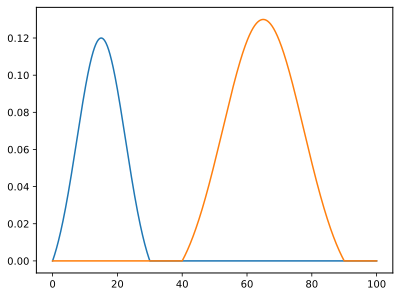

In [20]:
# Parameters for the first pulse

args1 = {
    'A': 0.12, 'start': 0, 'tg': 30, 'sigma': 30/4
}

# Parameters for the second pulse

args2 = {
    'A': 0.13, 'start': 40, 'tg': 50, 'sigma': 50/4
}

tsim = np.linspace(0, 100, 1000)

plt.plot(tsim, np.array([Omega(t, args1) for t in tsim]))
plt.plot(tsim, np.array([Omega(t, args2) for t in tsim]))

We also attempt to use the Gussian shape provided by Gambetta et al. PRA (2011).

In [24]:
from scipy import special

def OG(t, args):
    # We specify a time window in which the pulse amplitude is non-zero. Otherwise, we will have zero. 
    # Note that this way the pulse is not smoothly rising and falling.
    if t < (args['start']) or t > (args['start']+args['tg']):
        return 0 
    else:
        # We encounter an unknown time t during the simulation. We reset this time to the local time of the pulse by minus the starting point of the time window. 
        t += -args['start']
    # We return the pulse
        return args['A'] * (np.exp(-(t-args['tg']/2)**2/(2*args['sigma']**2)) - np.exp(-args['tg']**2/(8*args['sigma']**2))) \
                / (np.sqrt(2*np.pi*args['sigma']**2)*special.erf(args['tg']/(np.sqrt(8)*args['sigma']))-args['tg']*np.exp(-args['tg']**2/(8*args['sigma']**2)))

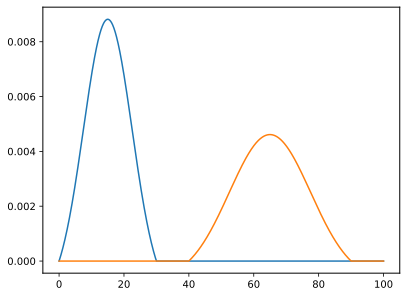

In [31]:
# Parameters for the first pulse

args1 = {
    'A': 0.1415926, 'start': 0, 'tg': 30, 'sigma': 30/4
}

# Parameters for the second pulse

args2 = {
    'A': 0.123456, 'start': 40, 'tg': 50, 'sigma': 50/4
}

tsim = np.linspace(0, 100, 1000)

plt.plot(tsim, np.array([OG(t, args1) for t in tsim]))
plt.plot(tsim, np.array([OG(t, args2) for t in tsim]))

In [342]:
from scipy.integrate import quad

def gaussian_for_integration(t):
    return Omega1(t, args)

args = pulse_train
area, error = quad(gaussian_for_integration, 0, 100)  # Integrate over the time range

print(f"Numerically calculated area under the Gaussian curve: {area:.6f}")

Numerically calculated area under the Gaussian curve: 5.136203


We have to be a bit careful here. It looks like $A$ is the only parameter that's responsible for the dimension here. Also both two functions seem to be working. Let's try both of them

In [36]:
def add_pulse(pulse_train, pulse_name, start, tg, sigma, A):
    """
    Add a pulse to the pulse train.
    """
    pulse_train[pulse_name] = {'start': start, 'tg': tg, 'sigma': sigma, 'A': A}
    pulse_train['clock'] = pulse_train['clock']+tg

In [51]:
def Omega1(t, args):
    for item, pulse_specs in args.items():
        if item == 'clock':
            continue
        if t <= pulse_specs['start'] or t >= (pulse_specs['start'] + pulse_specs['tg']):
            continue
        else:
            t_local = t
            t_local += -pulse_specs['start'] # convert to local time of a pulse
            return pulse_specs['A'] * (np.exp(-(t_local-pulse_specs['tg']/2)**2/(2*pulse_specs['sigma']**2)) - np.exp(-pulse_specs['tg']**2/(8*pulse_specs['sigma']**2))) \
                / (1-np.exp(-pulse_specs['tg']**2/(8*pulse_specs['sigma']**2)))
    return 0

def Omega2(t, args):
    for item, pulse_specs in args.items():
        if item == 'clock':
            continue
        if t <= pulse_specs['start'] or t >= (pulse_specs['start'] + pulse_specs['tg']):
            continue
        else:
            t_local = t
            t_local += -pulse_specs['start'] # convert to local time of a pulse
            return pulse_specs['A'] * (np.exp(-(t-pulse_specs['tg']/2)**2/(2*pulse_specs['sigma']**2)) - np.exp(-pulse_specs['tg']**2/(8*pulse_specs['sigma']**2))) \
                / (np.sqrt(2*np.pi*pulse_specs['sigma']**2)*special.erf(pulse_specs['tg']/(np.sqrt(8)*pulse_specs['sigma']))-pulse_specs['tg']*np.exp(-pulse_specs['tg']**2/(8*pulse_specs['sigma']**2)))
    return 0

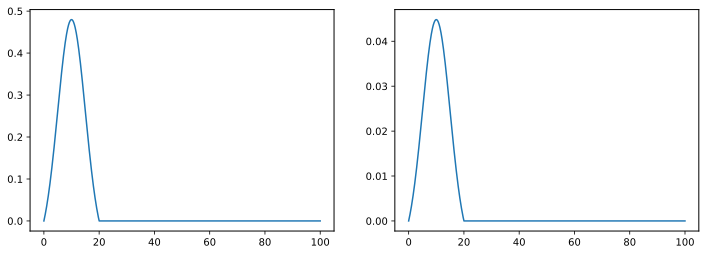

In [341]:
pulse_train = {'clock': 0}
add_pulse(pulse_train, pulse_name='pulse_1', start=pulse_train['clock'], tg=20, sigma=20/4, A=0.4797979797979798)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].plot(tsim, np.array([Omega1(t, pulse_train) for t in tsim]))
axes[1].plot(tsim, np.array([Omega2(t, pulse_train) for t in tsim]))

# The numerical Hamiltonian

I repeat here the truncated Hamiltonian

\begin{align}
    H'(t)=\begin{pmatrix}
    0 & \lambda_0\Omega^*(t)/2 & 0 & 0 \\
    \lambda_0{\Omega(t)}/2 & \delta & \lambda_1\Omega^*(t)/2 & 0 \\
    0 & \lambda_1{\Omega(t)}/2 & 2\delta+\Delta_2 & \lambda_2\Omega^*(t)/2 \\
    0 & 0 & \lambda_2\Omega^*(t)/2 & 3\delta+\Delta_3
    \end{pmatrix}
\end{align}    

In [54]:
dim = int(input('Declare the number of dimensions:'))
f_qubit = float(input('Declare the qubit fundamental frequency (GHz):'))
f_anhar = float(input('Declare the qubit anharmonicity (GHz):'))

print('Dimenions considering:', dim)
print('Qubit fundamental frequency:', f_qubit)
print('Qubit anharmonicity:', f_anhar)

Dimenions considering: 4
Qubit fundamental frequency: 4.985
Qubit anharmonicity: -0.3071


In [56]:
omega = 2 * np.pi * f_qubit
Delta_2 = 2 * np.pi * f_anhar

print('Qubit frequency:', omega)
print('Qubit anharmonicity:', Delta_2)

Qubit frequency: 31.32167875629024
Qubit anharmonicity: -1.9295662078348508


In [327]:
lambda_0, lambda_1, lambda_2 = 0.54, 0.61, 0.75

Hd1 = qt.Qobj([
    [0, 0, 0, 0], 
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

Hd2 = qt.Qobj([
    [0, 0, 0, 0], 
    [0, 0, 0, 0],
    [0, 0, 2, 0],
    [0, 0, 0, 0]
])

Hd3 = qt.Qobj([
    [0, 0, 0, 0], 
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 3]
])

H0 = qt.Qobj([
    [0, 0, 0, 0        ], 
    [0, 0, 0, 0        ],
    [0, 0, Delta_2, 0  ],
    [0, 0, 0, 3*Delta_2]
])

H1 = qt.Qobj([
    [0           , lambda_0 / 2   , 0           ,            0],
    [lambda_0 / 2, 0              , lambda_1 / 2,            0],
    [0           , lambda_1 / 2   , 0           , lambda_2 / 2],
    [0           , 0              , lambda_2 / 2,            0]
])

# Simulation of a Rabi oscillation

In [328]:
psi0 = qt.basis(dim, 0) 
c_ops = []
expect_ops = [qt.basis(dim, i)*qt.basis(dim, i).dag() for i in range(dim)]

f_rabi_range = np.linspace(0, 0.3, 100)

fluctuation_scale = 0
timescale_ns = 1
T_ns = 2*60
steps = 1000
time = np.linspace(0, T_ns, steps)  

raw_noise = np.random.normal(0, fluctuation_scale, steps)

smoothing_sigma = steps * (timescale_ns / T_ns)
fluctuations = gaussian_filter1d(raw_noise, sigma=smoothing_sigma)

omega_t = omega + fluctuations

omega_d = omega

def delta(t):
    return omega_t[np.argmin(np.abs(omega_t - t))] - omega_d

In [329]:
f_rabi_range

array([0.        , 0.0030303 , 0.00606061, 0.00909091, 0.01212121,
       0.01515152, 0.01818182, 0.02121212, 0.02424242, 0.02727273,
       0.03030303, 0.03333333, 0.03636364, 0.03939394, 0.04242424,
       0.04545455, 0.04848485, 0.05151515, 0.05454545, 0.05757576,
       0.06060606, 0.06363636, 0.06666667, 0.06969697, 0.07272727,
       0.07575758, 0.07878788, 0.08181818, 0.08484848, 0.08787879,
       0.09090909, 0.09393939, 0.0969697 , 0.1       , 0.1030303 ,
       0.10606061, 0.10909091, 0.11212121, 0.11515152, 0.11818182,
       0.12121212, 0.12424242, 0.12727273, 0.13030303, 0.13333333,
       0.13636364, 0.13939394, 0.14242424, 0.14545455, 0.14848485,
       0.15151515, 0.15454545, 0.15757576, 0.16060606, 0.16363636,
       0.16666667, 0.16969697, 0.17272727, 0.17575758, 0.17878788,
       0.18181818, 0.18484848, 0.18787879, 0.19090909, 0.19393939,
       0.1969697 , 0.2       , 0.2030303 , 0.20606061, 0.20909091,
       0.21212121, 0.21515152, 0.21818182, 0.22121212, 0.22424

In [333]:
pop_sim = []

for f_rabi in f_rabi_range:
    
    pulse_train = {'clock': 0}
    add_pulse(pulse_train, pulse_name='pulse_1', start=pulse_train['clock'], tg=60, sigma=60/4, A=f_rabi)
    args=pulse_train
    H = [H0, [H1, lambda t, args: Omega1(t, args)], [Hd1, lambda t: delta(t)], [Hd2, lambda t: delta(t)], [Hd3, lambda t: delta(t)]]
    result = qt.mesolve(H, psi0, time, c_ops, expect_ops, args=args)
    pop_sim.append([result.expect[i][-1] for i in range(dim)])

pop_sim = np.array(pop_sim)
pop_sim = pop_sim.T

In [334]:
args

{'clock': 60, 'pulse_1': {'start': 0, 'tg': 60, 'sigma': 15.0, 'A': 0.3}}

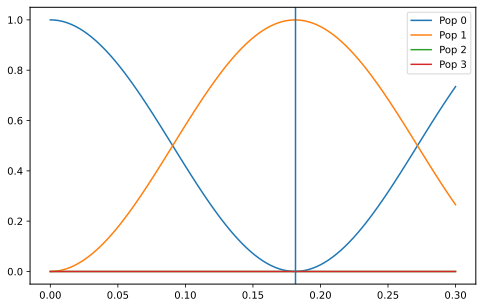

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

for i in range(dim):
    ax.plot(f_rabi_range, pop_sim[i], label=f"Pop {i}")

ax.axvline(0.4797979797979798)
ax.axvline(0.18151219398122395)
ax.legend()

# Generalize to a pulse train

In [13]:
def Omega(t, args):
    for item, pulse_specs in args.items():
        if item == 'clock':
            continue
        if t <= pulse_specs['start'] or t >= (pulse_specs['start'] + pulse_specs['tg']):
            continue
        else:
            t_local = t
            t_local += -pulse_specs['start'] # convert to local time of a pulse
            return pulse_specs['A'] * (np.exp(-(t_local-pulse_specs['tg']/2)**2/(2*pulse_specs['sigma']**2)) - np.exp(-pulse_specs['tg']**2/(8*pulse_specs['sigma']**2))) \
                / (1-np.exp(-pulse_specs['tg']**2/(8*pulse_specs['sigma']**2)))
    return 0

In [20]:
def deriv_Omega(t, args):
    for item, pulse_specs in args.items():
        if item == 'clock':
            continue
        if t <= pulse_specs['start'] or t >= (pulse_specs['start'] + pulse_specs['tg']):
            continue
        else:
            t_local = t
            t_local += -pulse_specs['start'] # convert to local time of a pulse
            return (pulse_specs['A']/(1-np.exp(-pulse_specs['tg']**2/(8*pulse_specs['sigma']**2)))) * (pulse_specs['tg']/2-t_local) * (np.exp(-(t_local-pulse_specs['tg']/2)**2/(2*pulse_specs['sigma']**2))) / (pulse_specs['sigma']**2)
    return 0

# Revision of the model

Perhaps we should also incorporate decoherence...

First we have population decay. We have two decay channels, $|2\rangle\to |1\rangle$ and $|1\rangle\to|0\rangle$. We neglect the third level decay since from simulation leakage to the third level is very much limited. Their collapse operators read
\begin{align}
\Gamma_{21}|1\rangle\langle 2|, \Gamma_{10}|0\rangle\langle 1|
\end{align}

Next, we have coherence decay. We define three decay rates $\Gamma_{1}, \Gamma_{2}, \Gamma_{3}$ corresponding to decay of coherences on three subspaces, $\{|0\rangle,|1\rangle\}, \{|1\rangle,|2\rangle\}, \{|0\rangle,|2\rangle\}$. Their collapse operators read
\begin{align}
    \Gamma_{1}(|0\rangle\langle 0|-|1\rangle\langle 1|), \Gamma_{2}(|1\rangle\langle 1|-|2\rangle\langle 2|), \Gamma_{3}(|0\rangle\langle 0|-|2\rangle\langle 2|)
\end{align}

We now tryna find $\Gamma_{21}|1\rangle\langle 2|, \Gamma_{10}|0\rangle\langle 1|$.

In [106]:
delay_time_mu = np.load('./characterization/T1/delay_time_mu.npy')
pop0_t1_012 = np.load('./characterization/T1/pop0_t1_012.npy')
pop1_t1_012 = np.load('./characterization/T1/pop1_t1_012.npy')
pop2_t1_012 = np.load('./characterization/T1/pop2_t1_012.npy')

In [108]:
def objective(args):
    A, B, C = args
    gamma_21 = A
    gamma_10 = B
    gamma_20 = C
    gamma_1 = 0
    gamma_2 = 0
    gamma_3 = 0

    c_ops = [np.sqrt(gamma_21)*(qt.basis(dim, 1)*qt.basis(dim, 2).dag()), np.sqrt(gamma_10)*(qt.basis(dim, 0)*qt.basis(dim, 1).dag()), np.sqrt(gamma_20)*(qt.basis(dim, 0)*qt.basis(dim, 2).dag()), \
            np.sqrt(gamma_1)*(qt.basis(dim, 0)*qt.basis(dim, 0).dag()-qt.basis(dim, 1)*qt.basis(dim, 1).dag()), \
            np.sqrt(gamma_2)*(qt.basis(dim, 1)*qt.basis(dim, 1).dag()-qt.basis(dim, 2)*qt.basis(dim, 2).dag()), \
            np.sqrt(gamma_3)*(qt.basis(dim, 0)*qt.basis(dim, 0).dag()-qt.basis(dim, 2)*qt.basis(dim, 2).dag())]

    pop_t1 = []
    psi0 = qt.basis(dim, 2)
    delay_time_ns = delay_time_mu*1e-6/1e-9 # convert to ns

    for tau in delay_time_ns:
        time = np.arange(0, tau, 1)
        result = qt.mesolve(H0, psi0, time, c_ops, expect_ops)
        pop_t1.append([result.expect[i][-1] for i in range(dim)])

    pop_t1 = np.array(pop_t1)
    pop_dif = (np.abs(pop_t1[:, 0] - pop0_t1_012)**2 + np.abs(pop_t1[:, 1] - pop1_t1_012)**2 + np.abs(pop_t1[:, 2] - pop2_t1_012)**2)/3
    print(np.average(pop_dif)) 

    return np.average(pop_dif)

In [109]:
from scipy.optimize import minimize

x0 = [6.2e-06, 4.72700145e-06, 7.88932531e-07]
solution = minimize(objective, x0, method='Nelder-Mead', tol=1e-9, options={'maxiter': 100})

solution

c:\Users\ngdnh\AppData\Local\Programs\Python\Python311\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


0.0005320982515971565
0.0005337274159912674
0.0004454362618124638
0.0005091766703906577
0.0005526424605586512
0.0005006620972731152
0.0004398308858576977
0.00041158110871337034
0.00040029066385542184
0.00037700581547032346
0.0003599489901200535
0.0003706350252830116
0.00039123171672340705
0.0003858492672602523
0.00035284005945173877
0.0003696751302501339
0.00043914671375013697
0.0003598596970121606
0.0003593816879453026
0.00034959436014788314
0.0003542201566347941
0.00036278590947754727
0.00035209929586335923
0.000351320498347338
0.0003607112618711765
0.00034847191626166175
0.0003434242680992795
0.0003418184275574881
0.0003459553654097924
0.00034803549745969275
0.00033827875771064555
0.0003379761750257335
0.00033695158488950656
0.00034405862392725383
0.0003378750097484452
0.00033809027979818086
0.00033466648934902437
0.00033208288079292285
0.00033478790812978694
0.00034575631236934313
0.0003331544146134725
0.00033769328115876496
0.00033344178648269453
0.000333965841666671
0.00033257394

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.00033176663545415256
             x: [ 6.665e-06  6.059e-06  4.196e-07]
           nit: 53
          nfev: 96
 final_simplex: (array([[ 6.665e-06,  6.059e-06,  4.196e-07],
                       [ 6.664e-06,  6.058e-06,  4.201e-07],
                       [ 6.664e-06,  6.059e-06,  4.197e-07],
                       [ 6.665e-06,  6.059e-06,  4.198e-07]]), array([ 3.318e-04,  3.318e-04,  3.318e-04,  3.318e-04]))

In [110]:
solution.x

array([6.66512493e-06, 6.05906170e-06, 4.19561332e-07])

In [111]:
gamma_21 = solution.x[0]
gamma_10 = solution.x[1]
gamma_20 = solution.x[2]
gamma_1 = 0
gamma_2 = 0
gamma_3 = 0

c_ops = [np.sqrt(gamma_21)*(qt.basis(dim, 1)*qt.basis(dim, 2).dag()), np.sqrt(gamma_10)*(qt.basis(dim, 0)*qt.basis(dim, 1).dag()), np.sqrt(gamma_20)*(qt.basis(dim, 0)*qt.basis(dim, 2).dag()), \
        np.sqrt(gamma_1)*(qt.basis(dim, 0)*qt.basis(dim, 0).dag()-qt.basis(dim, 1)*qt.basis(dim, 1).dag()), \
        np.sqrt(gamma_2)*(qt.basis(dim, 1)*qt.basis(dim, 1).dag()-qt.basis(dim, 2)*qt.basis(dim, 2).dag()), \
        np.sqrt(gamma_3)*(qt.basis(dim, 0)*qt.basis(dim, 0).dag()-qt.basis(dim, 2)*qt.basis(dim, 2).dag())]

pop_t1 = []
psi0 = qt.basis(dim, 2)
delay_time_ns = delay_time_mu*1e-6/1e-9 # convert to ns

for tau in delay_time_ns:
    time = np.arange(0, tau, 1)
    result = qt.mesolve(H0, psi0, time, c_ops, expect_ops)
    pop_t1.append([result.expect[i][-1] for i in range(dim)])

pop_t1 = np.array(pop_t1)

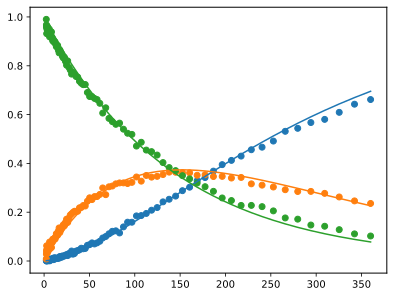

In [112]:
plt.plot(delay_time_mu, pop_t1[:, 0])
plt.plot(delay_time_mu, pop_t1[:, 1])
plt.plot(delay_time_mu, pop_t1[:, 2])
plt.scatter(delay_time_mu, pop0_t1_012)
plt.scatter(delay_time_mu, pop1_t1_012)
plt.scatter(delay_time_mu, pop2_t1_012)

# Simulation of the over/under-rotation sequence

In [21]:
pop_aae_uncorrected = np.load('./simulation/re_pop2_without_correction.npy')
pop_aae_scaling = np.load('./simulation/re_pop2_scaling.npy')

In [23]:
def objective(args2):
    A, B = args2
    gamma_21 = 0
    gamma_10 = 0
    gamma_1 = 0
    gamma_2 = A
    gamma_3 = 0

    c_ops = [np.sqrt(gamma_21)*(qt.basis(dim, 1)*qt.basis(dim, 2).dag()), np.sqrt(gamma_10)*(qt.basis(dim, 0)*qt.basis(dim, 1).dag()), \
            np.sqrt(gamma_1)*(qt.basis(dim, 0)*qt.basis(dim, 0).dag()-qt.basis(dim, 1)*qt.basis(dim, 1).dag()), \
            np.sqrt(gamma_2)*(qt.basis(dim, 1)*qt.basis(dim, 1).dag()-qt.basis(dim, 2)*qt.basis(dim, 2).dag()), \
            np.sqrt(gamma_3)*(qt.basis(dim, 0)*qt.basis(dim, 0).dag()-qt.basis(dim, 2)*qt.basis(dim, 2).dag())]

    pop_aae = []
    psi0 = qt.basis(dim, 1) 
    N0 = 21
    N_list = np.array([2*n for n in range(N0)])
    A0 = B

    for N in N_list:
        fluctuation_scale = 0
        timescale_ns = 1
        T_ns = 20 + 40 * N                        
        steps = 5000                    
        time = np.linspace(0, T_ns, steps)  

        raw_noise = np.random.normal(0, fluctuation_scale, steps)

        smoothing_sigma = steps * (timescale_ns / T_ns)
        fluctuations = gaussian_filter1d(raw_noise, sigma=smoothing_sigma)

        omega_t = omega + fluctuations

        omega_d = omega + Delta_2

        def delta(t):
            return omega_t[np.argmin(np.abs(omega_t - t))] - omega_d
        pulse_train = {'clock': 0}
        add_pulse(pulse_train, pulse_name=f'pulse_0', start=0, tg=20, sigma=20/4, A=(A0)*2*np.pi)
        for idx in range(N):
            add_pulse(pulse_train, pulse_name=f'pulse_{idx},1', start=pulse_train['clock'], tg=20, sigma=20/4, A=(A0)*2*np.pi)
            add_pulse(pulse_train, pulse_name=f'pulse_{idx},2', start=pulse_train['clock'], tg=20, sigma=20/4, A=(A0)*2*np.pi)
        args=pulse_train
        H = [H0, [H1, lambda t, args: Omega(t, args)], [Hd1, lambda t: delta(t)], [Hd2, lambda t: delta(t)], [Hd3, lambda t: delta(t)]]
        result = qt.mesolve(H, psi0, time, c_ops, expect_ops, args=args)
        pop_aae.append([result.expect[i][-1] for i in range(dim)])

    pop_aae = np.array(pop_aae)
    pop_dif = np.abs(pop_aae[:, 2] - pop_aae_uncorrected)**2
    print(np.average(pop_dif))

    return np.average(pop_dif)

In [24]:
from scipy.optimize import minimize

x0 = [5.008e-05, 2.555e-01]
solution = minimize(objective, x0, method='Nelder-Mead', tol=1e-9, options={'maxiter': 100})

solution

0.00018138089231402513


KeyboardInterrupt: 

In [1523]:
gamma_21 = 0
gamma_10 = 0
gamma_1 = 0
gamma_2 = solution.x[0]
gamma_3 = 0

c_ops = [np.sqrt(gamma_21)*(qt.basis(dim, 1)*qt.basis(dim, 2).dag()), np.sqrt(gamma_10)*(qt.basis(dim, 0)*qt.basis(dim, 1).dag()), \
        np.sqrt(gamma_1)*(qt.basis(dim, 0)*qt.basis(dim, 0).dag()-qt.basis(dim, 1)*qt.basis(dim, 1).dag()), \
        np.sqrt(gamma_2)*(qt.basis(dim, 1)*qt.basis(dim, 1).dag()-qt.basis(dim, 2)*qt.basis(dim, 2).dag()), \
        np.sqrt(gamma_3)*(qt.basis(dim, 0)*qt.basis(dim, 0).dag()-qt.basis(dim, 2)*qt.basis(dim, 2).dag())]

pop_aae = []
psi0 = qt.basis(dim, 1) 
N0 = 21
N_list = np.array([2*n for n in range(N0)])
A0 = solution.x[1]

for N in N_list:
    fluctuation_scale = 0
    timescale_ns = 1
    T_ns = 20 + 40 * N                        
    steps = 5000                    
    time = np.linspace(0, T_ns, steps)  

    raw_noise = np.random.normal(0, fluctuation_scale, steps)

    smoothing_sigma = steps * (timescale_ns / T_ns)
    fluctuations = gaussian_filter1d(raw_noise, sigma=smoothing_sigma)

    omega_t = omega + fluctuations

    omega_d = omega + Delta_2

    def delta(t):
        return omega_t[np.argmin(np.abs(omega_t - t))] - omega_d
    pulse_train = {'clock': 0}
    add_pulse(pulse_train, pulse_name=f'pulse_0', start=0, tg=20, sigma=20/4, A=(A0)*2*np.pi)
    for idx in range(N):
        add_pulse(pulse_train, pulse_name=f'pulse_{idx},1', start=pulse_train['clock'], tg=20, sigma=20/4, A=(A0)*2*np.pi)
        add_pulse(pulse_train, pulse_name=f'pulse_{idx},2', start=pulse_train['clock'], tg=20, sigma=20/4, A=(A0)*2*np.pi)
    args=pulse_train
    H = [H0, [H1, lambda t, args: Omega(t, args)], [Hd1, lambda t: delta(t)], [Hd2, lambda t: delta(t)], [Hd3, lambda t: delta(t)]]
    result = qt.mesolve(H, psi0, time, c_ops, expect_ops, args=args)
    pop_aae.append([result.expect[i][-1] for i in range(dim)])

pop_aae = np.array(pop_aae)

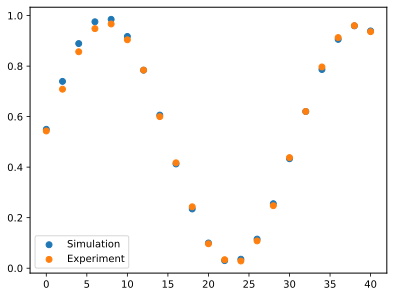

In [1524]:
N0 = 21
N_list = np.array([2*n for n in range(N0)])

plt.scatter(N_list, pop_aae[:, 2], label=f'Simulation')
plt.scatter(N_list, pop_aae_uncorrected, label=f'Experiment')
# plt.ylim([0.4, 0.6])
plt.legend()